## Clustered Web Services

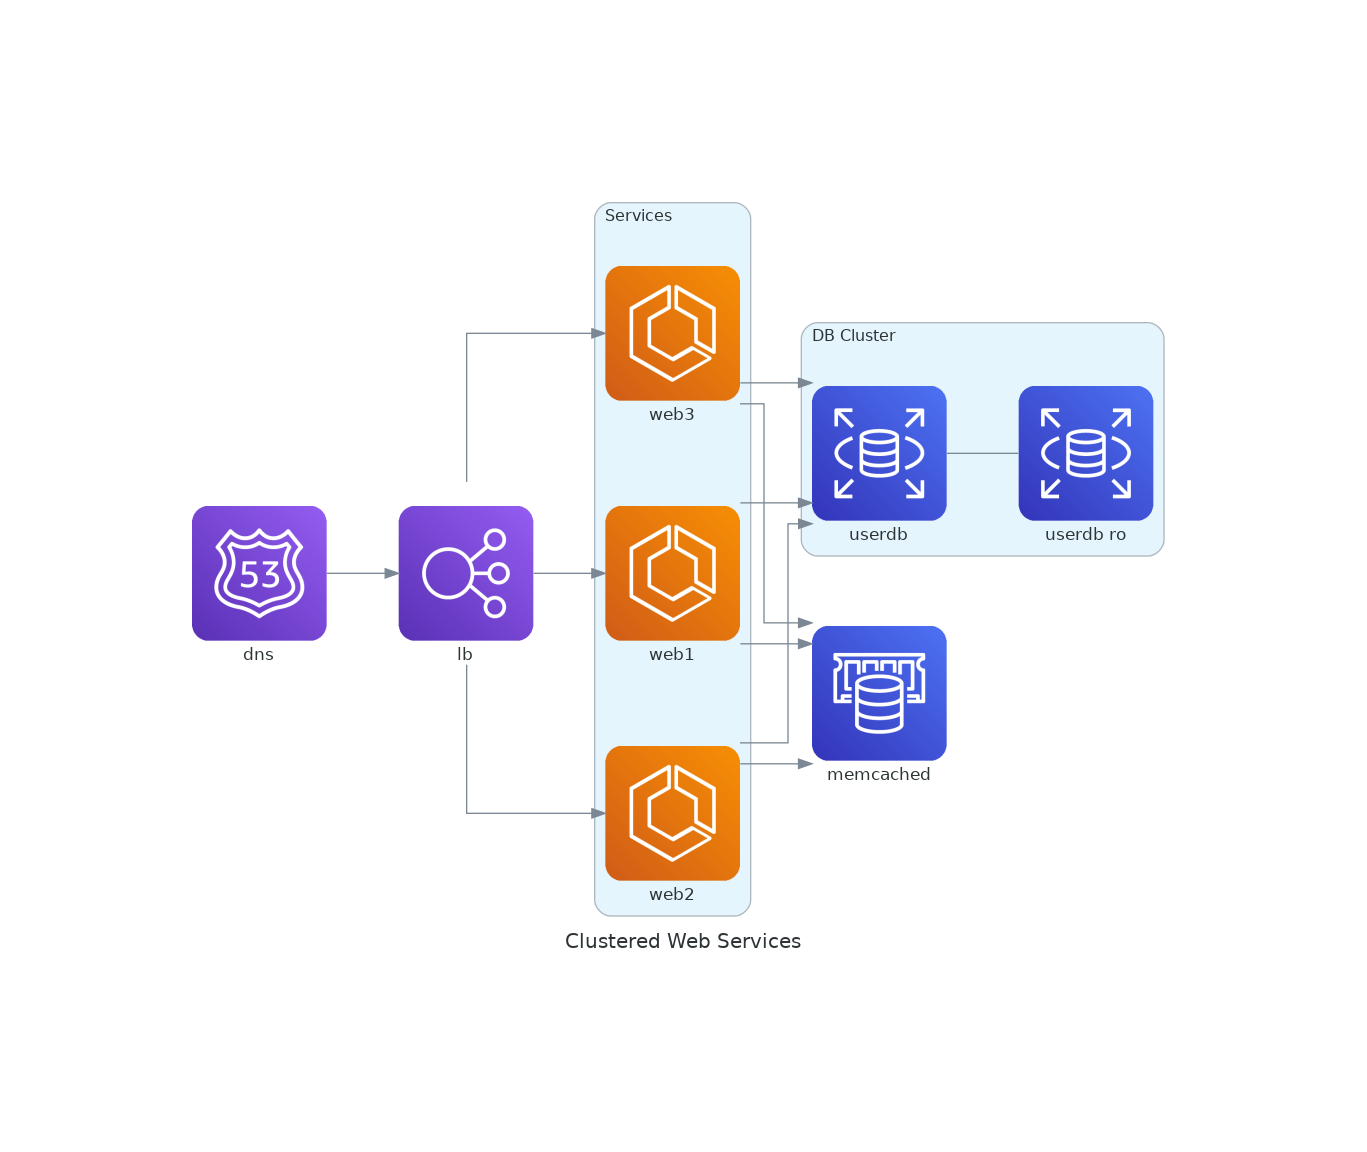

In [6]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.aws.database import ElastiCache, RDS
from diagrams.aws.network import ELB, Route53

with Diagram("Clustered Web Services", filename="diagrams/clustered-web-services", outformat="png", show=False) as diagram:
    dns = Route53("dns")
    lb = ELB("lb")

    with Cluster("Services"):
        svc_group = [ECS("web1"), ECS("web2"), ECS("web3")]

    with Cluster("DB Cluster"):
        db_master = RDS("userdb")
        db_master - [RDS("userdb ro")]

    memcached = ElastiCache("memcached")

    dns >> lb >> svc_group
    svc_group >> db_master
    svc_group >> memcached

diagram